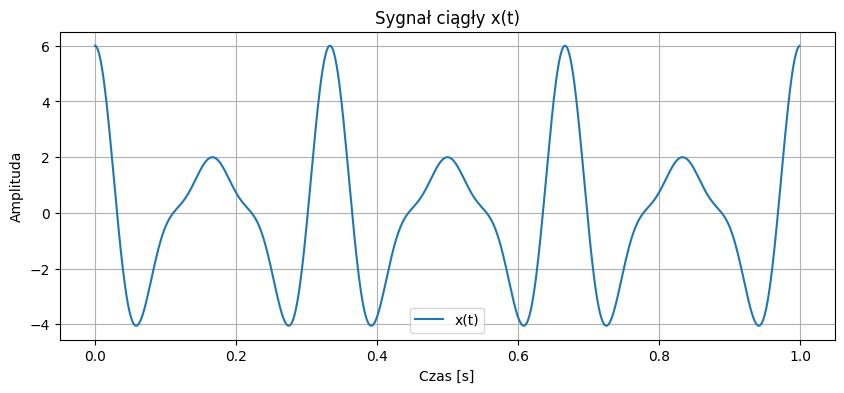

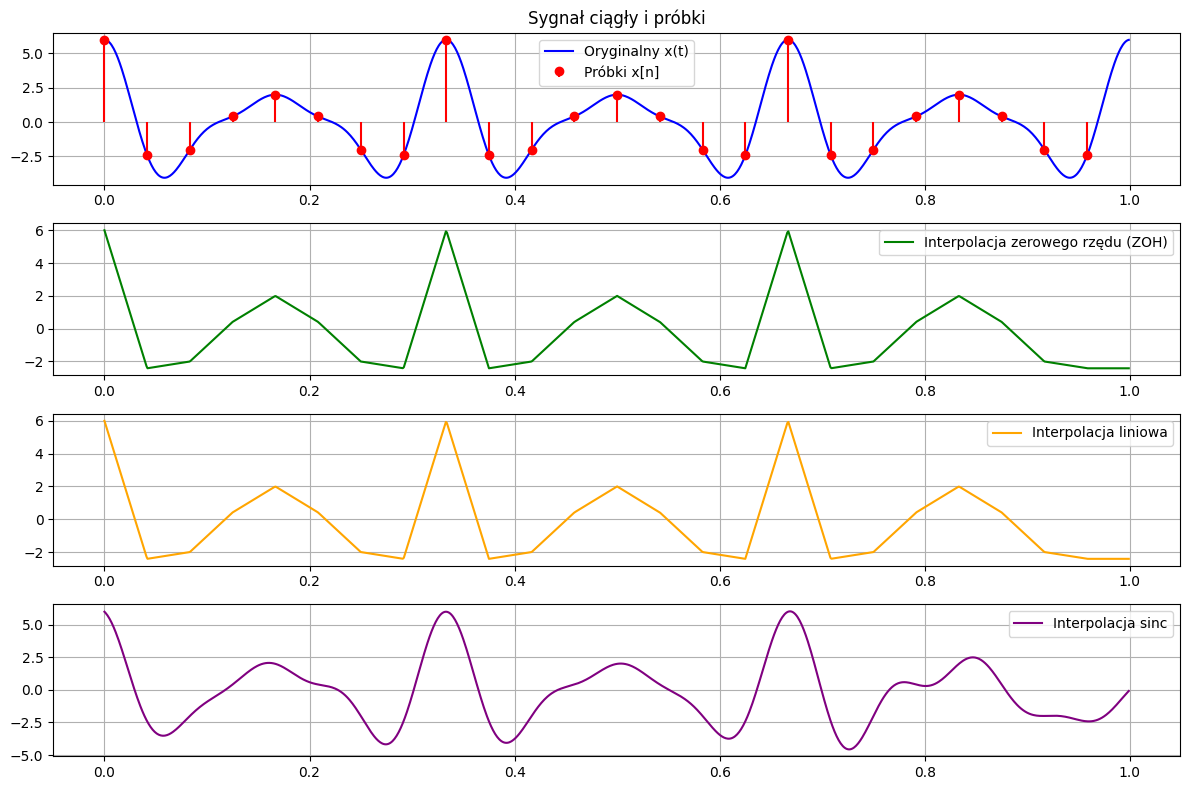

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parametry sygnału
f1 = 6   # Hz
f2 = 9   # Hz
f3 = 12  # Hz
A1 = 3
A2 = 2
A3 = 1

# Czas dla sygnału analogowego
t = np.linspace(0, 1, 1000, endpoint=False)  # 1 sekunda, 1000 próbek

# Sygnał analogowy
x_t = A1*np.cos(2*np.pi*f1*t) + A2*np.cos(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# Wykres sygnału analogowego
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label='x(t)')
plt.title('Sygnał ciągły x(t)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()

# Próbkowanie
fs = 24  # Hz
Ts = 1/fs
n = np.arange(0, 1, Ts)  # próbki w czasie od 0 do 1 sekundy
x_n = A1*np.cos(2*np.pi*f1*n) + A2*np.cos(2*np.pi*f2*n) + A3*np.cos(2*np.pi*f3*n)

# Interpolacja zerowego rzędu
t_zeroth, x_zeroth = signal.step(([], [1], 1), T=t)
x_zoh = np.interp(t, n, x_n, left=None, right=None, period=None)

# Interpolacja pierwszego rzędu (liniowa)
x_linear = np.interp(t, n, x_n)

# Interpolacja sinc
def sinc_interp(x, s, t):
    T = s[1] - s[0]
    sinc_matrix = np.tile(t, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(t)))
    return np.dot(x, np.sinc(sinc_matrix / T))

x_sinc = sinc_interp(x_n, n, t)

# Wykresy porównawcze
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, x_t, label='Oryginalny x(t)', color='blue')
plt.stem(n, x_n, linefmt='r-', markerfmt='ro', basefmt=' ', label='Próbki x[n]')
plt.legend()
plt.title('Sygnał ciągły i próbki')
plt.grid(True)


plt.subplot(4, 1, 2)
plt.plot(t, x_zoh, label='Interpolacja zerowego rzędu (ZOH)', color='green')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, x_linear, label='Interpolacja liniowa', color='orange')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, x_sinc, label='Interpolacja sinc', color='purple')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
